<a href="https://colab.research.google.com/github/FauzanAdithya/Python-Model-and-Simulation/blob/main/Tugas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import dependencies
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#helper function that deletes all values from a that are also in b
def deletebfroma(a,b):
    index = np.array([], dtype = np.int16)
    for number in range(len(a)):
        if a[number] in b:
            index = np.append(index, number)

    return np.delete(a, index)
        

# the whole thing is an object
class salesman(object):
    #initialize the object
    def __init__(self, xymax, numberofstops, maxmen, mutationrate, verbose = False, mutatebest = True):
        
        self.numberofstops = numberofstops #number of points to connect
        self.mutatebest = mutatebest #wether the best path at each iteration should be mutated or not
        self.verbose = verbose #wether the best and worst paths for each iteration should be shown
        self.maxmen = maxmen #maximum number of route
        self.xymax = xymax #size of the "map"
        self.mutationrate = mutationrate # rate of mutation 0.1 is plenty
        
        #randomly initialize the targets
        self.targets = np.random.randint(xymax, size=(numberofstops, 2))
        #randomly initialize the route
        self.men = np.empty((maxmen, numberofstops), dtype = np.int32)
        for number in range(maxmen):
            tempman = np.arange(numberofstops, dtype = np.int32)
            np.random.shuffle(tempman)
            self.men[number] = tempman
        
        #find the best route of the first created
        self.best = np.array(self.getbestsalesmen())[...,0][0]
    
    #Method that returns the best route at runtime
    def getbestsalesmen(self):
        #initiate a temporary order
        temporder = np.empty([len(self.men), 2], dtype = np.int32)
        #write the indexes of the route to temporder before ordering changes them
        for number in range(len(self.men)):
            temporder[number] = [number, 0,]
        #get length of path for all route
        for number in range(len(self.men)):
            templength = 0
            #get length of path
            for target in range(len(self.targets) - 1):
                diffx = abs(self.targets[self.men[number][target]][0] - self.targets[self.men[number][target + 1]][0])
                diffy = abs(self.targets[self.men[number][target]][1] - self.targets[self.men[number][target + 1]][1])
                diff = diffy + diffx
                templength = templength + diff
            #add length of way back
            diffx = abs(self.targets[self.men[number][0]][0] - self.targets[self.men[number][-1]][0])
            diffy = abs(self.targets[self.men[number][0]][1] - self.targets[self.men[number][-1]][1])
            diff = diffy + diffx
            templength = templength + diff
            #add length to order
            temporder[number][1] = templength
        #Sort route by length of path
        temporder = sorted(temporder, key=lambda x: -x[1])
        #return the best half of the route rounded up
        return temporder[int(len(temporder)/2):]
    
    #function that breeds two route and returns the offspring
    def breed(self, parent1, parent2):
        #get length of first dna strand (half of it)
        halflength = round(len(self.men[parent1])/2) #length of half a dna strand
        #get a random starting point for taking the first dna sample
        start = np.random.randint(halflength)
        #Get first dna sample
        dna1 = self.men[parent1][start:start+halflength]
        #get second dna sample by deleting first sample from dna of second parent
        dna2 = self.men[parent2][:]
        dna2 = deletebfroma(dna2,dna1)
        #create offspring by using dna2 as base and inserting dna1 at the position it was in Parent 1
        offspring = np.insert(dna2, start ,dna1)
        return offspring
    
    #fill the route up with new offspring
    def breednewgeneration(self):
        #get best route indexes
        best = np.array(self.getbestsalesmen())[...,0]
        #replace route by newly bred offspring if they are not among the best
        for i in range(len(self.men)):
            if i not in best:
                self.men[i] = self.breed(random.choice(best), random.choice(best))
                
    #mutate route
    def mutate(self):
        for i in range(len(self.men)):#for ach route
            if self.mutatebest == True or i != self.best:#mutate best if it is set to true
                for j in range(len(self.men[i]) - 1): # for each piece of dna
                    if random.random() < self.mutationrate:#if random is < mutationrate
                            #switch places with random other gene, might hit itself, but whatever
                            rand = random.randint(0, self.numberofstops - 1)
                            temp = self.men[i][j]
                            self.men[i][j] = self.men[i][rand]
                            self.men[i][rand] = temp
        
    #start calculation
    def calculate(self, iterations):
        #get best and bestlength
        best = np.array(self.getbestsalesmen())[...,0][-1]
        bestlength = np.array(self.getbestsalesmen())[...,1][-1]
        #print best and bestlength at start
        print(self.men[best])
        print('best length: ', bestlength)
        self.draw(best)
        #repeat for number of iterations
        for number in range(iterations):
            #give indication for status
            if number == round(iterations/4):
                print("Status: 1/4")
            if number == round((iterations/4) * 2):
                print("Status: 2/4")
            if number == round((iterations/4) * 3):
                print("Status: 3/4")
            #create new generation
            self.breednewgeneration()
            #set new best as parameter for next iteration
            self.best = np.array(self.getbestsalesmen())[...,0][-1]
            #mutate route
            self.mutate()
            #shout out best and worst length with each iteration if verbose is true
            if self.verbose == 1:
                bestlength = np.array(self.getbestsalesmen())[...,1][-1]
                print('best length: ', bestlength)
                worstlength = np.array(self.getbestsalesmen())[...,1][0]
                print('worst length: ', worstlength)
        #print and draw final best
        best = np.array(self.getbestsalesmen())[...,0][-1]
        bestlength = np.array(self.getbestsalesmen())[...,1][-1]
        print(self.men[best])
        print('best length: ', bestlength)
        self.draw(best)
    
    #draw shiny graphics
    def draw(self, index):
        plt.scatter(self.targets[[...,0]], self.targets[[...,1]], s=20)
        plt.show()
        plt.scatter(self.targets[[...,0]], self.targets[[...,1]], s=20)
        linearray = self.targets[self.men[index]]
        linearray = np.append(linearray, [linearray[0]], axis = 0)
        plt.plot(linearray[[...,0]], linearray[[...,1]])
        plt.show()

[80 95  1 97 10  5 75 61 79 51 38 78  7 92 42 13 40  8 39 72 99  4 41 56
 26 47 65  3 33 96 11 49 85  0 48 19 45 17 29 25 21 77 35 71 91  6 18 23
 87 46 53  9 93 73 15 30 59 24 88 63 32 69 57 66 74  2 86 16 58 84 12 34
 90 64 98 62 43 28 36 14 81 76 37 20 50 82 83 68 67 22 52 27 89 31 44 94
 54 70 55 60]
best length:  6110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:138: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


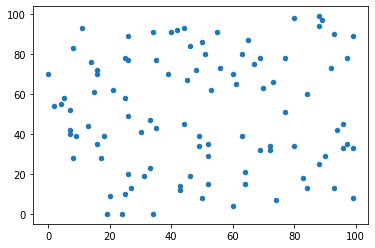

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


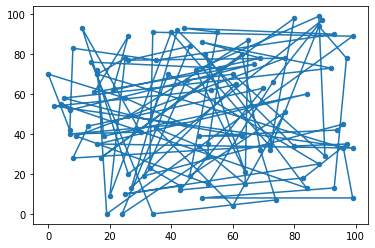

Status: 1/4
Status: 2/4
Status: 3/4
[ 4  2  9 42 69 60 70 81 44 73 93 39 64 65 22 54 49 80  6 27  1 82 46 15
 43 67 19 91 50 16 61 92 48 37 17 29 10 79 68 58 55 45 75 33  8 88 30 13
 24  5 78 28 26 14 41  3 11 77 59 71 32 89 34 63 97 72 94 76 12 52 18 31
  7 38 40 95 99 85 20 57 74 84 83 36 90 66 53 21 23 62 96 51 98 87  0 86
 56 47 35 25]
best length:  3572


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:138: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


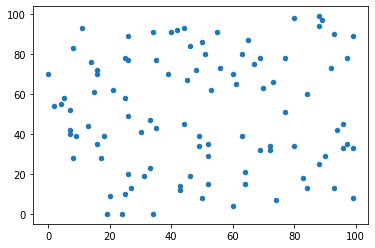

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


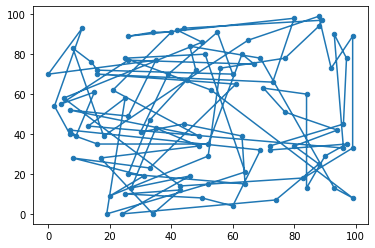

In [4]:
#initialize object
man = salesman(100, 100, 25, 0.1, verbose = False, mutatebest = False)

#start calculation
man.calculate(400000)